# Text Classification 

# Notebook Content
[Library and Data](#Library-and-Data)<br>
[Reading Data](#Reading-Data)<br>
[Logistic Regression Classifier](#Logistic-Regression-Classifier)<br>
[Support Vector Classifier](#Support-Vector-Classifier)<br>
[Complement Naive Bayes Classifier](#Complement-Naive-Bayes-Classifier)<br>
[Multinomial Naive Bayes Classifier](#Multinomial-Naive-Bayes-Classifier)<br>
[Bernoulli Naive Bayes Classifier](#Bernoulli-Naive-Bayes-Classifier)<br>
[Gradient Boost Classifier](#Gradient-Boost-Classifier)<br>
[XGBoost Classifier](#XGBoost-Classifier)<br>
[Random Forest Classifier](#Random-Forest-Classifier)<br>
[KNN Classifier](#KNN-Classifier)<br>    

# Library and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

import nltk
import nltk as nlp
import string
import re
true = pd.read_csv("dataset/True.csv")
fake = pd.read_csv("dataset/Fake.csv")

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Reading Data

In [2]:
fake['target'] = 'fake'
true['target'] = 'true'
news = pd.concat([fake, true]).reset_index(drop = True)
news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake

# Data Exploration & Visualisation
First, we will see how many categories are there

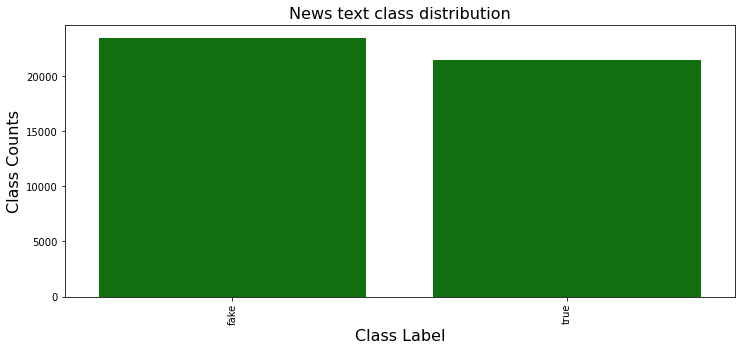

In [3]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(x=news.target, color='green')
plt.title('News text class distribution', fontsize=16)
plt.ylabel('Class Counts', fontsize=16)
plt.xlabel('Class Label', fontsize=16)
plt.xticks(rotation='vertical');

As a next step, we have to see what type of contents are there in the ‘text’ field of the dataset. For that, we have to clean the texts first.
A typical text cleaning process involves the following steps
1. Conversion to lowercase
2. Removal of punctuations
3. Removal of integers, numbers
4. Removal of extra spaces
5. Removal of tags (like html, p etc)
6. Removal of stop words (like ‘and’, ‘to’, ‘the’ etc)
7. Stemming (Conversion of words to root form)

We will use Python ‘**gensim**’ library for all text cleaning.

In [4]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [5]:
news.iloc[2,1]

'On Friday, it was revealed that former Milwaukee Sheriff David Clarke, who was being considered for Homeland Security Secretary in Donald Trump s administration, has an email scandal of his own.In January, there was a brief run-in on a plane between Clarke and fellow passenger Dan Black, who he later had detained by the police for no reason whatsoever, except that maybe his feelings were hurt. Clarke messaged the police to stop Black after he deplaned, and now, a search warrant has been executed by the FBI to see the exchanges.Clarke is calling it fake news even though copies of the search warrant are on the Internet. I am UNINTIMIDATED by lib media attempts to smear and discredit me with their FAKE NEWS reports designed to silence me,  the former sheriff tweeted.  I will continue to poke them in the eye with a sharp stick and bitch slap these scum bags til they get it. I have been attacked by better people than them #MAGA I am UNINTIMIDATED by lib media attempts to smear and discredi

In [6]:
clean_text(news.iloc[2,1])

'fridai reveal milwauke sheriff david clark consid homeland secur secretari donald trump administr email scandal januari brief run plane clark fellow passeng dan black later detain polic reason whatsoev mayb feel hurt clark messag polic stop black deplan search warrant execut fbi exchang clark call fake new copi search warrant internet unintimid lib media attempt smear discredit fake new report design silenc sheriff tweet continu poke ey sharp stick bitch slap scum bag til attack better peopl maga unintimid lib media attempt smear discredit fake new report design silenc continu poke ey sharp stick bitch slap scum bag til attack better peopl maga pic twitter com xtzwpdub david clark sheriffclark decemb stop break new ly lib media make fake new smear antidot right punch nose tast blood get bulli like ly lib media attent better tast blood neverbackdown pic twitter com tnypshcr david clark sheriffclark decemb internet call local newspap search warrant isn fake chose file charg time mean wo

The text became little non-grammatical but it is required for understanding.

We will write a function for visualising ‘text’ contents as ‘Word Cloud’

In [9]:
%matplotlib inline

from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

We have to concatenate all texts and pass it to this function

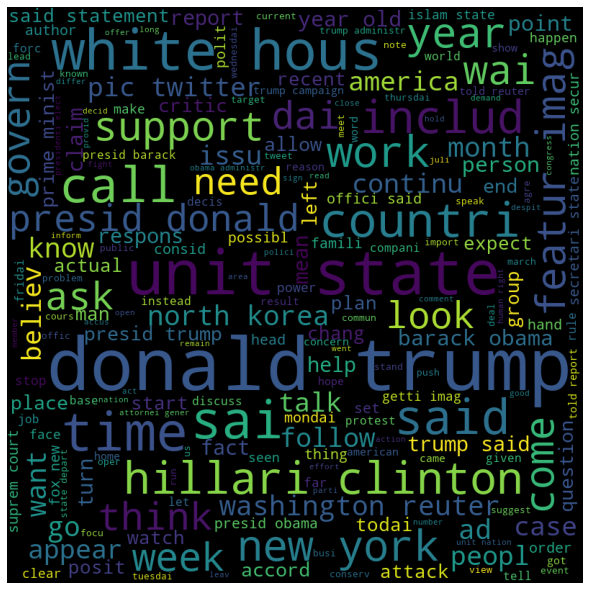

In [12]:
texts = ''
for index, item in news.iterrows():
    #print(index)
    texts = texts + ' ' + clean_text(item['text'])
    
plot_word_cloud(texts)

In [20]:
def plot_word_cloud_for_category(news, category):
    text_df = news.loc[news['target'] == str(category)]
    texts = ''
    for index, item in text_df.iterrows():
        texts = texts + ' ' + clean_text(item['text'])
    
    plot_word_cloud(texts)

Now, we will see more meaningful insights: ‘Word Cloud’ of ‘text’ for a particular ‘target’.

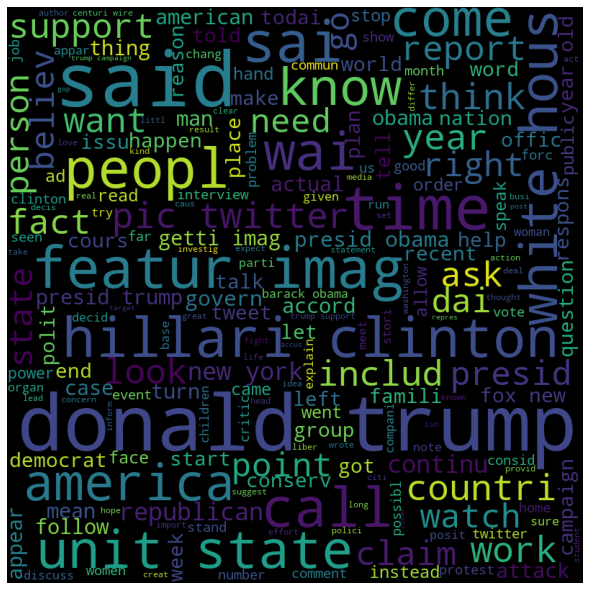

In [21]:
plot_word_cloud_for_category(news,'fake')

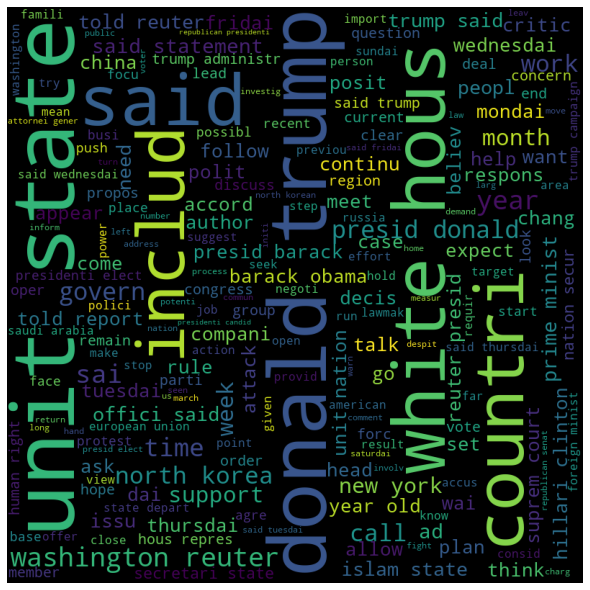

In [22]:
plot_word_cloud_for_category(news,'true')

<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Cleaning the data

In [25]:
news['text'] = news['text'].apply(lambda x: clean_text(x)) 

In [26]:
news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  donald trump couldn wish american happi new ye...    News   
1  hous intellig committe chairman devin nune go ...    News   
2  fridai reveal milwauke sheriff david clark con...    News   
3  christma dai donald trump announc work follow ...    News   
4  pope franci annual christma dai messag rebuk d...    News   

                date target  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake

# Logistic Regression Classifier

In this algorithm, the probabilities describing the possible outcomes of a single trial are modelled using a logistic function.
It is used to model the probability of a certain class or event existing 
such as pass/fail, win/lose, alive/dead or healthy/sick.

In [27]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.81%


In [28]:
print(confusion_matrix(y_test, prediction))

[[4673   67]
 [  40 4200]]


In [29]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4740
        true       0.98      0.99      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Support Vector Classifier

The support vector machine is a classifier that represents the training data as points in space separated into categories by a gap as wide as possible. 
New points are then added to space by predicting which category they fall into and which space they will belong to.

More often text classification use cases will have linearly separable data and LinearSVC is apt for such scenarios

In [30]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.44%


In [31]:
print(confusion_matrix(y_test, prediction))

[[4710   30]
 [  20 4220]]


In [32]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4740
        true       0.99      1.00      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# Complement Naive Bayes Classifier

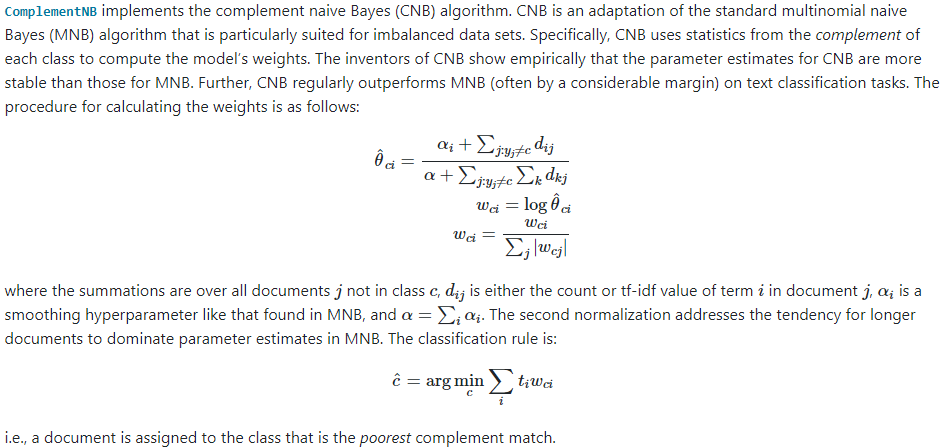

In [58]:

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', ComplementNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.25%


In [59]:
print(confusion_matrix(y_test, prediction))

[[4439  301]
 [ 215 4025]]


In [60]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.95      0.94      0.95      4740
        true       0.93      0.95      0.94      4240

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Multinomial Naive Bayes Classifier

It is based on Bayes’s theorem which gives an assumption of independence among predictors. 
A Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. 
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data,it works with occurrence counts of words and to form vector

In [56]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.28%


In [10]:
print(confusion_matrix(y_test, prediction))

[[4486  254]
 [ 324 3916]]


In [11]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.93      0.95      0.94      4740
        true       0.94      0.92      0.93      4240

    accuracy                           0.94      8980
   macro avg       0.94      0.93      0.94      8980
weighted avg       0.94      0.94      0.94      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Bernoulli Naive Bayes Classifier
BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors

In [12]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 94.14%


In [34]:
print(confusion_matrix(y_test, prediction))

[[4454  286]
 [ 228 4012]]


In [35]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.95      0.94      0.95      4740
        true       0.93      0.95      0.94      4240

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>

# Gradient Boost Classifier

GB builds an additive model in a forward stage-wise fashion
It allows for the optimization of arbitrary differentiable loss functions. 
Binary classification is a special case where only a single regression tree is induced.

In [36]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.55%


In [39]:
print(confusion_matrix(y_test, prediction))

[[4704   36]
 [   4 4236]]


In [40]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4740
        true       0.99      1.00      1.00      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# XGBoost Classifier

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. 
Rather than training all the models in isolation of one another, boosting trains models in succession
with each new model being trained to correct the errors made by the previous ones

In a standard ensemble method where models are trained in isolation, all of the models might simply end up making the same mistakes.
We should use this algorithm when we require fast and accurate predictions after the model is deployed


In [41]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

[18:51:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { loss } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


accuracy: 99.53%


In [42]:
print(confusion_matrix(y_test, prediction))

[[4702   38]
 [   4 4236]]


In [43]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      1.00      4740
        true       0.99      1.00      1.00      4240

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# Random Forest Classifier

Random forest are an ensemble learning method.
It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes of the individual trees.
A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature.
The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

We should use this algorithm when we need high accuracy while working with large datasets with higher dimensions. We can also use it if there are missing values in the dataset. We should not use it if we have less time for modeling or if large computational costs and memory space are a constrain.

In [44]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.24%


In [45]:
print(confusion_matrix(y_test, prediction))

[[4686   54]
 [  14 4226]]


In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       1.00      0.99      0.99      4740
        true       0.99      1.00      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<a class="list-group-item list-group-item-action" data-toggle="list" href="#Text-Classification" role="tab" aria-controls="profile">Go to top<span class="badge badge-primary badge-pill"></span></a>


# KNN Classifier

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 69.83%


In [52]:
print(confusion_matrix(y_test, prediction))

[[4644   96]
 [2613 1627]]


In [53]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

        fake       0.64      0.98      0.77      4740
        true       0.94      0.38      0.55      4240

    accuracy                           0.70      8980
   macro avg       0.79      0.68      0.66      8980
weighted avg       0.78      0.70      0.67      8980

